# Epilepsy Prediction

In [88]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import chain

In [64]:
#Load the data from satellite image #1 
seizure_raw = pd.read_csv('data/seizure.csv', delimiter=',')
#Check out the data - sanity check
# print seizure_raw.shape
# seizure_raw.head()

In [65]:
#clean up data
seizure_df = seizure_raw[['y1','y2','y3','y4','trt','base','age']]
print seizure_raw.shape
seizure_df.head()

(59, 8)


,y1,y2,y3,y4,trt,base,age
0,5,3,3,3,0,11,31
1,3,5,3,3,0,11,30
2,2,4,0,5,0,6,25
3,4,4,1,4,0,8,36
4,7,18,9,21,0,66,22


In [66]:
#let's take a look at the summary statistics of the data
seizure_df.describe()

,y1,y2,y3,y4,trt,base,age
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,8.949153,8.355932,8.440678,7.338983,0.525424,31.237288,28.847458
std,14.835214,10.187488,14.148561,9.637588,0.503640,26.883747,7.619878
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000
25%,2.000000,3.000000,2.000000,3.000000,0.000000,12.000000,22.500000
50%,4.000000,5.000000,4.000000,5.000000,1.000000,22.000000,28.000000
75%,10.500000,11.500000,8.000000,8.000000,1.000000,41.500000,33.500000
max,102.000000,65.000000,76.000000,63.000000,1.000000,151.000000,57.000000


Looks like TRT is a boolean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf39610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1219d8a10>]], dtype=object)

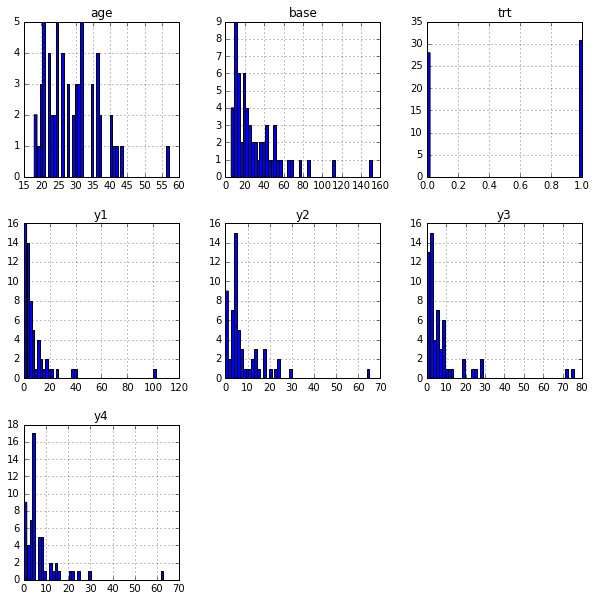

In [89]:
# let's see the variance in the data
seizure_df.hist(figsize=[10,10],bins=50)

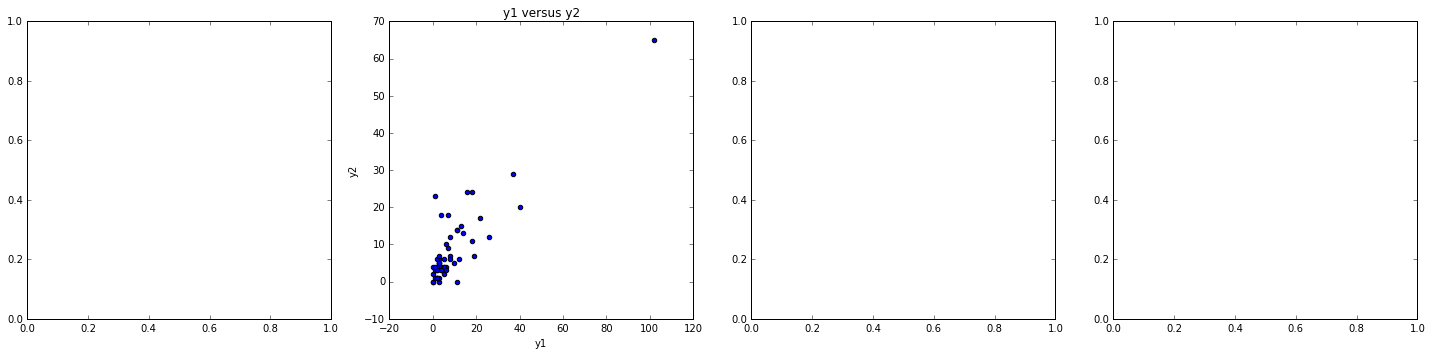

In [90]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
x=seizure_df['y1'].values
y=seizure_df['y2'].values
ax[1].scatter(x,y)
#Label everything
ax[1].set_xlabel('y1')
ax[1].set_ylabel('y2')
ax[1].set_title('y1 versus y2')
ax[1].legend()
    
plt.tight_layout()
plt.show() 

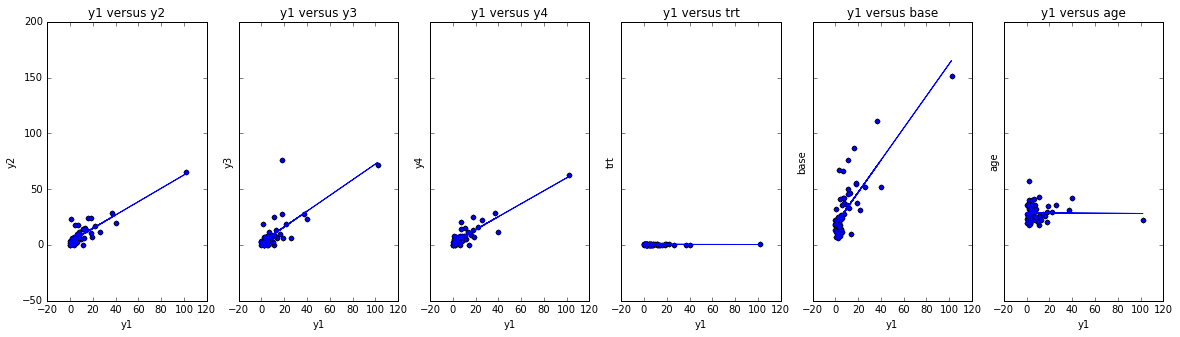

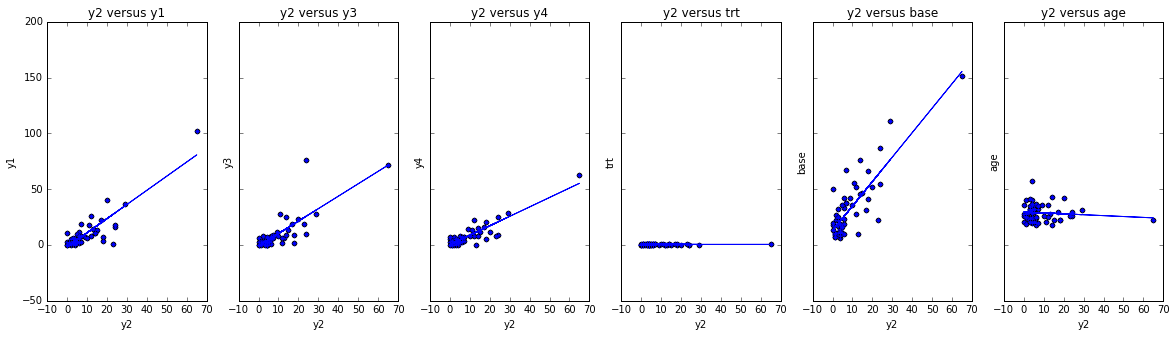

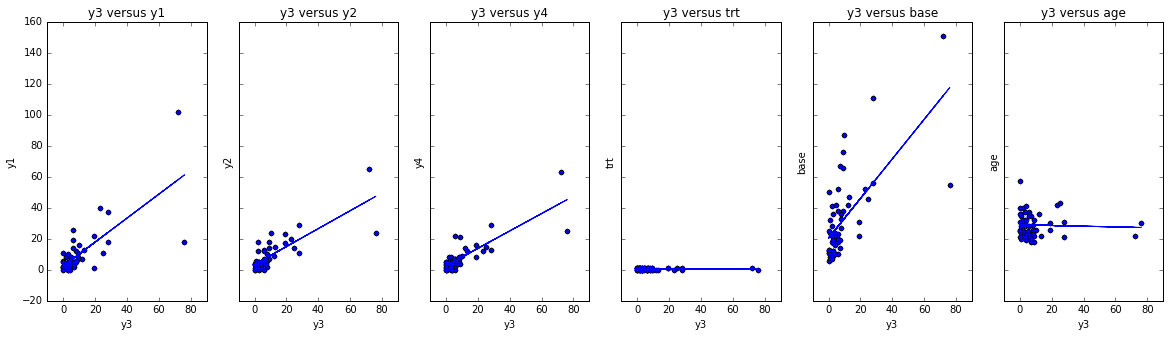

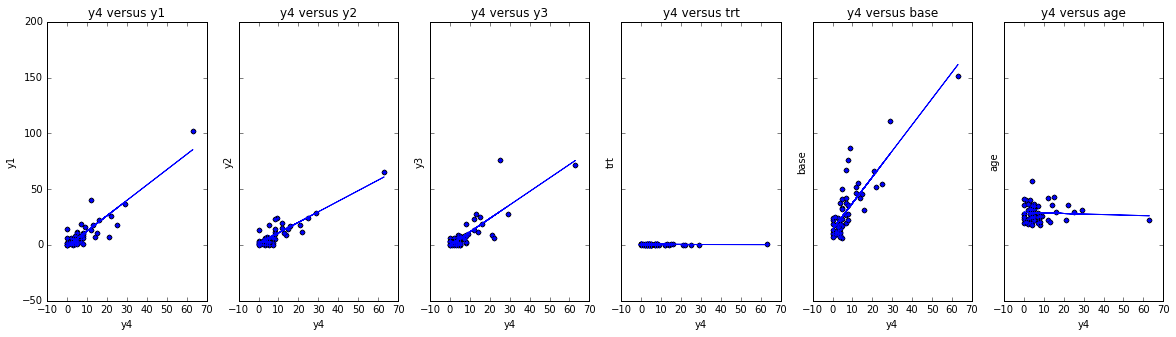

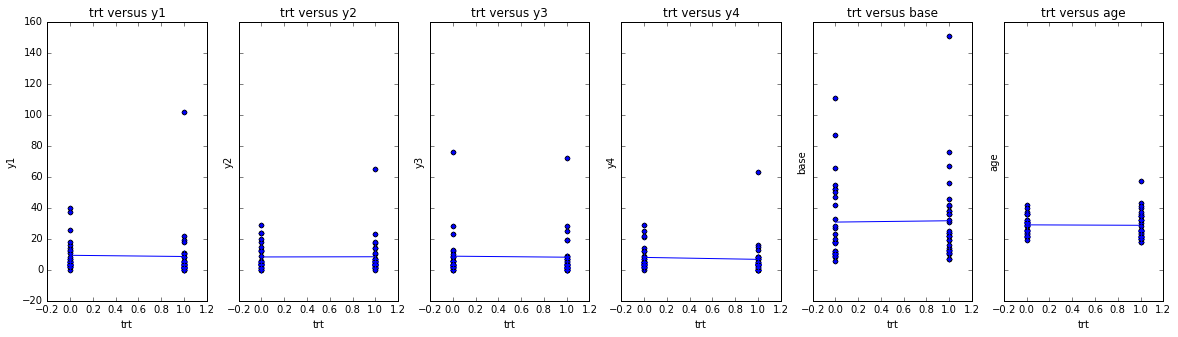

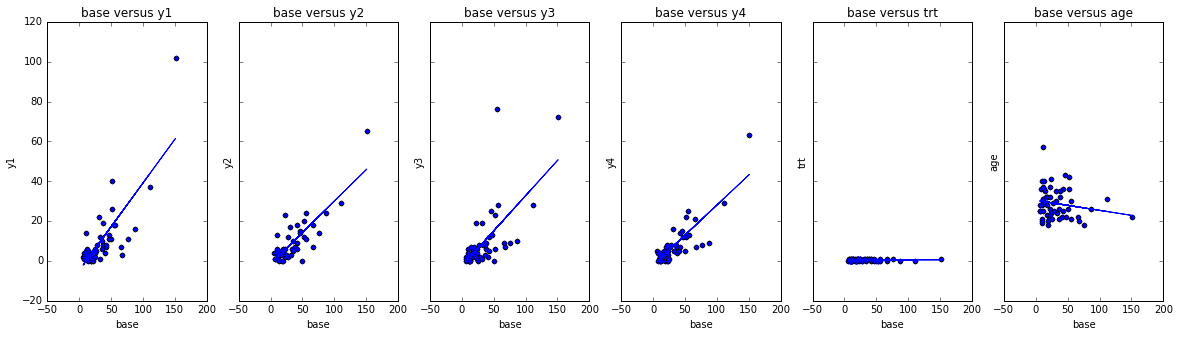

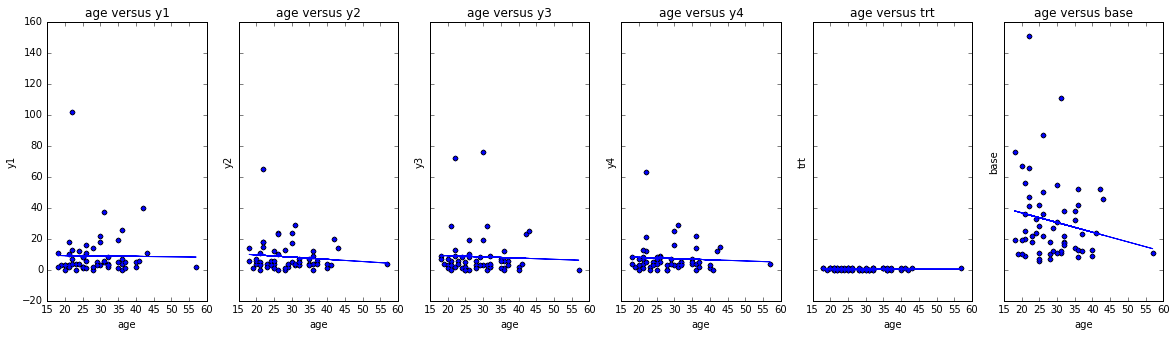

In [116]:
columns=list(seizure_df)
for x_column in columns:
# x_column = columns[0]
    cols = columns[:]
    cols.remove(x_column)

    fig, axes = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20,5))

    for y_column, ax in zip(cols, axes):
        if y_column != x_column:
            x = seizure_df[x_column]
            y = seizure_df[y_column]
            fit = np.polyfit(x, y, 1)
            fitx = np.poly1d(fit)
            ax.plot(x, y, 'b+', x, fitx(x),'b-')
            ax.set_xlabel(x_column)
            ax.set_ylabel(y_column)
            ax.set_title(x_column + ' versus ' + y_column)
            ax.scatter(x,y)